<div class="usecase-title">Real Estate Market Analysis and Forecasting</div>

<div class="usecase-authors"><b>Authored by: </b> Vivek Olladapu</div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, matpotlib, numpy</div>
</div>

<div class="usecase-section-header">Scenario</div>

Urban growth and real estate development are influenced by several factors, including location, nearby infrastructure, and historical construction patterns. In a rapidly developing city like Melbourne, the ability to monitor and predict where development is taking place, and understand the reasons behind it, is essential for effective urban planning, informed investment decisions, and policy-making.

This use case focuses on analyzing historical building permits and development activity across suburbs in Melbourne using publicly available datasets. The analysis is enriched with data on surrounding landmarks and infrastructure, such as schools, hospitals, and places of worship, to examine how proximity to these amenities impacts development patterns.

Time series analysis techniques are used to identify historical trends and generate forecasts using ARIMA models. The findings are presented through interactive maps and trend plots, offering clear visual insights into development activity across the city. This approach helps to understand the growth patterns in Melbourne and provides a foundation for anticipating future development.

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
- How to fetch real estate and infrastructure data from Melbourne’s Open Data portal using APIs.
- Clean and preprocess raw geospatial and time series datasets using Python and pandas.
- Perform time-based trend analysis of development activity across suburbs.
- Apply time series forecasting using ARIMA to predict future developments.
- Visualize insights using interactive maps and trend plots.
- Identify relationships between development hotspots and nearby public landmarks.

# Importing the libraries
Step 1: Importing the required libraries

In [6]:
import requests
import pandas as pd
from io import StringIO
!pip install folium

Reading first data set through API for the building permits

In [8]:
base_url='https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id='building-permits'


url=f'{base_url}{dataset_id}/exports/csv'
params={'select':'*','limit':-1,'lang':'en','timezone':'UTC'}

response=requests.get(url,params=params)

if response.status_code==200:
    url_content=response.content.decode('utf-8')
    development_df=pd.read_csv(StringIO(url_content),delimiter=';')
    print(development_df.head(10))
else:
    print(f'Request failed with status code {response.status_code}')

      council_ref                permit_number  issue_date  \
0  BP-2022-1019/1      BS-U 1081/4654569677812  2022-09-12   
1    BP-2022-1608                6263984568552  2023-02-27   
2    BP-2022-1608                6263984568552  2023-04-26   
3    BP-2022-1608                6263984568552  2023-04-26   
4   BP-2021-937/1             7273127133673/V2  2022-06-30   
5   BP-2022-522/2  CBS-U 53725 / 5045702415087  2022-08-01   
6   BP-2022-522/2  CBS-U 53725 / 5045702415087  2023-10-02   
7    BP-2022-1604                6836792626183  2022-10-21   
8    BP-2022-1604              6836792626183/V  2022-10-21   
9   BP-2022-621/1                2161528117195  2023-07-26   

                                             address  \
0    Part Level 5 34 Queen Street MELBOURNE VIC 3000   
1         247-255 Lonsdale Street MELBOURNE VIC 3000   
2         247-255 Lonsdale Street MELBOURNE VIC 3000   
3  Shop Ground 270 Swanston Street MELBOURNE VIC ...   
4           409-413 St Kilda Road MEL

This dataset shows details about building permits issued in Melbourne. Some buildings have multiple permits because big projects are done in stages. Expensive projects, like those costing over $100 million, are mostly in busy areas such as Melbourne city and Southbank. The permits include different types like building permits, occupancy permits, and final inspection certificates, which show the progress of a project from start to finish. The dates also show that construction usually takes 2 to 3 years to complete. The address column tells us where each project is happening, and the estimated cost helps us understand how big or small the project is.

Reading second dataset through API for the landmarks for public places 

In [10]:
base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id='landmarks-and-places-of-interest-including-schools-theatres-health-services-spor'


url=f'{base_url}{dataset_id}/exports/csv'
params={'select':'*','limit':-1,'lang':'en','timezone':'UTC'}

response=requests.get(url,params=params)

if response.status_code==200:
    url_content=response.content.decode('utf-8')
    landmarks_df=pd.read_csv(StringIO(url_content),delimiter=';')
    print(landmarks_df.head(10))
else:
    print(f'Request failed with status code {response.status_code}')

              theme           sub_theme                     feature_name  \
0  Place of Worship              Church                St Francis Church   
1  Place of Worship              Church                  St James Church   
2  Place of Worship              Church        St Mary's Anglican Church   
3  Place of Worship              Church                     Scots Church   
4  Place of Worship              Church      St Michael's Uniting Church   
5  Place of Worship              Church            Greek Orthodox Church   
6  Place of Worship              Church          North Melbourne Uniting   
7  Place of Worship              Church  South Yarra Presbyterian Church   
8  Place of Worship           Synagogue         East Melbourne Synagogue   
9         Transport  Transport Terminal                Port of Melbourne   

                          co_ordinates  
0  -37.8118847831837, 144.962422614541  
1  -37.8101281201969, 144.952468571683  
2  -37.8031663672997, 144.953761537074  

This dataset lists important public places in Melbourne, like churches, synagogues, and transport terminals. These locations are helpful for understanding the local community and urban setup. Each place includes coordinates, which makes it easy to map them and see how close they are to residential or development areas. This can be useful when studying how nearby landmarks might affect property value or planning decisions.

Importing the third dataset throgh API for development activity 

In [12]:
base_url='https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id='development-activity-monitor'


url=f'{base_url}{dataset_id}/exports/csv'
params={'select':'*','limit':-1,'lang':'en','timezone':'UTC'}

response=requests.get(url,params=params)

if response.status_code==200:
    url_content=response.content.decode('utf-8')
    permits_df=pd.read_csv(StringIO(url_content),delimiter=';')
    print(permits_df.head(10))

else:
    print(f'Request failed with status code {response.status_code}')

  data_format development_key     status  year_completed  \
0  Pre May 16         X000568  COMPLETED          2012.0   
1  Pre May 16         X000557  COMPLETED          2002.0   
2  Pre May 16         X000448  COMPLETED          2015.0   
3  Pre May 16         X000458  COMPLETED          2004.0   
4  Pre May 16         X000996  COMPLETED          2013.0   
5  Pre May 16         X000955  COMPLETED          2002.0   
6  Pre May 16         X000404  COMPLETED          2013.0   
7  Pre May 16         X000532  COMPLETED          2003.0   
8  Pre May 16         X000122  COMPLETED          2010.0   
9  Pre May 16         X000124  COMPLETED          2006.0   

                clue_small_area  clue_block  \
0  West Melbourne (Residential)         411   
1  West Melbourne (Residential)         401   
2               North Melbourne         314   
3               North Melbourne         330   
4               North Melbourne        1012   
5                     Parkville         903   
6         

This dataset provides information about completed development projects in Melbourne. Each row shows details like the year a project was completed, the suburb, exact address, and coordinates. This data helps identify development patterns and active growth zones across Melbourne.

# Step 3 : Data Preprocessing and Exploratory Data Analysis

The output shows a steady rise in the number of permits issued in the Carlton suburb between 1994 and 1998. For example, only 17 permits were issued in 1994, but this number rose sharply to 216 by 1998. This indicates a period of high construction and development activity in Carlton during the mid-to-late 1990s. These insights are valuable for identifying periods of growth and understanding how development evolved across different regions in Melbourne.

In [14]:
permits_df_cleaned = development_df.drop(columns=['rbs_number', 'commence_by_date', 'completed_by_date', 'permit_certificate_type', 'desc_of_works', 'council_ref'])
permits_df_cleaned = permits_df_cleaned.dropna(subset=['issue_date'])
permits_df_cleaned['issue_date'] = pd.to_datetime(permits_df_cleaned['issue_date'], errors='coerce')
permits_df_cleaned['suburb'] = permits_df_cleaned['address'].str.extract(r'\b([A-Z\s]+)\sVIC\b')
permits_df_cleaned = permits_df_cleaned.dropna(subset=['suburb'])
permits_df_cleaned['year'] = permits_df_cleaned['issue_date'].dt.year
permits_aggregated = permits_df_cleaned.groupby(['suburb', 'year']).size().reset_index(name='permit_count')
print(permits_aggregated.head())


     suburb  year  permit_count
0   CARLTON  1994            17
1   CARLTON  1995            81
2   CARLTON  1996           111
3   CARLTON  1997           111
4   CARLTON  1998           216


In [16]:
columns_to_drop = ['property_id_2', 'property_id_3', 'property_id_4', 'property_id_5',
                   'data_format', 'development_key', 'property_id', 'town_planning_application', 'geopoint']

existing_cols = [col for col in columns_to_drop if col in permits_df.columns]
development_df_cleaned = permits_df.drop(columns=existing_cols)

# Drop rows with missing key data
required_cols = [col for col in ['year_completed', 'latitude', 'longitude'] if col in development_df_cleaned.columns]
development_df_cleaned = development_df_cleaned.dropna(subset=required_cols)

# Convert year to integer
if 'year_completed' in development_df_cleaned.columns:
    development_df_cleaned['year_completed'] = development_df_cleaned['year_completed'].astype(int)

# Group by suburb and year
if 'clue_small_area' in development_df_cleaned.columns:
    development_aggregated = development_df_cleaned.groupby(['clue_small_area', 'year_completed']).size().reset_index(name='development_count')
    print(development_aggregated.head())


  clue_small_area  year_completed  development_count
0         Carlton            2002                  3
1         Carlton            2003                  9
2         Carlton            2004                  2
3         Carlton            2005                  4
4         Carlton            2006                  6


This output shows the number of developments completed in Carlton between 2002 and 2006. While the numbers are relatively small, the steady yearly activity suggests ongoing development in the area. This type of aggregation helps to track long-term trends and spot which suburbs have been consistently growing or experiencing development spikes.

# Plotting Trends from the data based on the suburbs


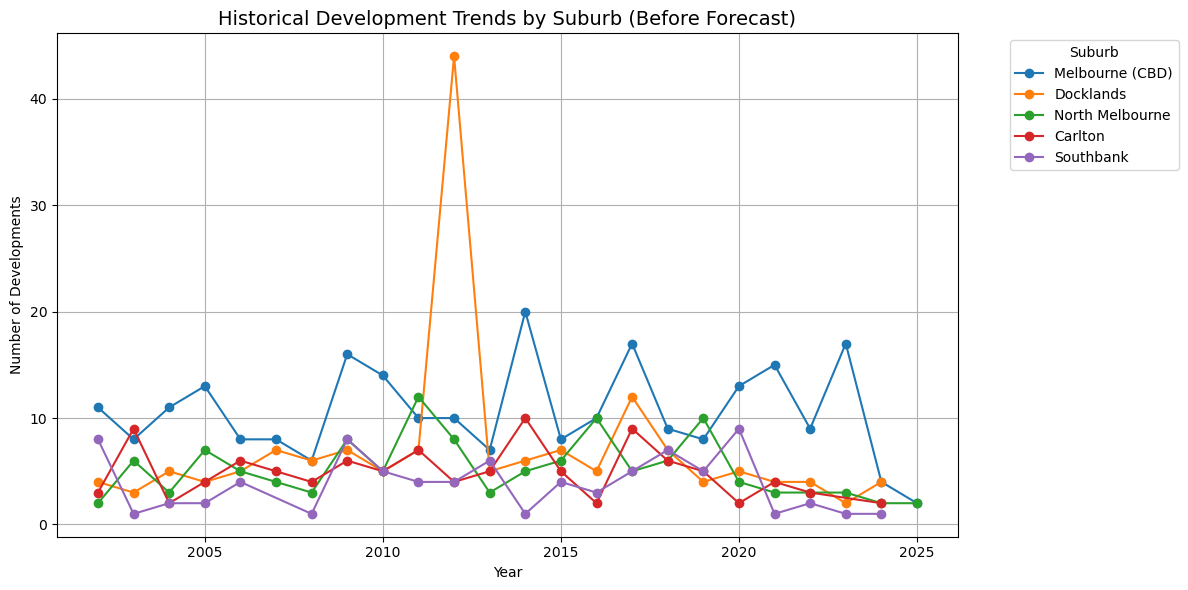

In [18]:
import matplotlib.pyplot as plt

# Historical data: actual developments per year per suburb
historical_trends = development_df_cleaned.groupby(['clue_small_area', 'year_completed']).size().reset_index(name='count')

# Pick top 5 most active suburbs
top_suburbs = historical_trends.groupby('clue_small_area')['count'].sum().nlargest(5).index.tolist()

plt.figure(figsize=(12, 6))

# Plot historical trend lines
for suburb in top_suburbs:
    suburb_data = historical_trends[historical_trends['clue_small_area'] == suburb]
    plt.plot(suburb_data['year_completed'], suburb_data['count'], marker='o', label=suburb)

# Aesthetics
plt.title('Historical Development Trends by Suburb (Before Forecast)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Developments')
plt.legend(title='Suburb', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


This line graph shows the number of developments completed each year across the five most active suburbs in Melbourne. Melbourne (CBD) had the highest and most consistent development activity throughout the years, with notable peaks around 2010, 2015, and 2020. Docklands shows a sharp spike in development around 2010, indicating a concentrated burst of projects during that time. North Melbourne, Carlton, and Southbank present relatively stable development patterns, with occasional fluctuations but no significant surges. The chart provides a clear view of historical development distribution and highlights the areas with sustained construction growth over time.

In [20]:
import folium
from folium.plugins import MarkerCluster, HeatMap

# Initialize base map centered on Melbourne
initial_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=13)

# --- Development Markers Cluster ---
dev_cluster = MarkerCluster(name='Developments').add_to(initial_map)
for idx, row in development_df_cleaned.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['street_address']}<br>Year: {row['year_completed']}",
        icon=folium.Icon(color='blue', icon='home', prefix='glyphicon')
    ).add_to(dev_cluster)

# --- Development Heatmap ---
heat_data = development_df_cleaned[['latitude', 'longitude']].dropna().values.tolist()
HeatMap(heat_data, name='Development Heatmap', radius=10).add_to(initial_map)

# --- Amenities (Landmarks) Layers ---
themes = landmarks_df['theme'].unique()
icons = {
    'Place of Worship': 'cloud', 'Education': 'education', 'Health Services': 'plus-sign',
    'Transport': 'road', 'Community Use': 'user', 'Entertainment': 'music',
    'Sport': 'flag', 'Tourist Attraction': 'star'
}

for theme in themes:
    group = folium.FeatureGroup(name=theme).add_to(initial_map)
    for idx, row in landmarks_df[landmarks_df['theme'] == theme].iterrows():
        try:
            lat, lon = map(float, row['co_ordinates'].split(','))
            folium.Marker(
                location=[lat, lon],
                popup=row['feature_name'],
                icon=folium.Icon(icon=icons.get(theme, 'info-sign'), color='green')
            ).add_to(group)
        except:
            continue  # skip invalid coordinate rows

# Adding Layer Control
folium.LayerControl().add_to(initial_map)

# --- Save the Map ---
initial_map.save('initial_interactive_map.html')

from IPython.display import IFrame
IFrame('initial_interactive_map.html', width=700, height=500)

The interactive map provides a comprehensive view of development activity in Melbourne alongside key public landmarks. Clusters of green markers represent different types of amenities such as places of worship, transport hubs, educational institutions, and health services. Blue markers indicate the locations of completed developments, grouped using marker clustering for better visual clarity. The overlaid heatmap highlights areas with high concentrations of development activity, particularly near the city center and surrounding key infrastructure. The map’s layer control allows users to toggle visibility of different themes, enabling focused analysis of how development patterns relate to nearby facilities. This visualization effectively shows the spatial distribution of developments and their proximity to important public services, making it useful for urban planning and real estate analysis.